# Objective: 

* Explore the dataset and extract actionable insights that will enable growth in the market.
* Perform univariate and multivariate analysis.
* Building customer profiles (characteristics of a customer) for the different products.
* Generate set recommendations that will help the company in targeting new customers.


# Data:
**CardioGoodFitness.csv** - it contains information about customers purchasing product.
* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run

### Import the necessary packages

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [14]:
data=pd.read_csv("CardioGoodFitness.csv")

In [15]:
# copying data to another varaible to avoid any changes to original data
cardio=data.copy()

### View the first and last 5 rows of the dataset.

In [16]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [17]:
cardio.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Understand the shape of the dataset.

In [18]:
cardio.shape

(180, 9)

* Dataset has 180 rows and 9 columns.

### Check the data types of the columns for the dataset.

In [19]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Fixing the data types
* All variables are Integer are valid data type except for fitness, it is a rating given by a customer for self-fitness on a scale of 5, it should be treated as a category.


* Product,Gender and Marital Status are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [20]:
cardio["Product"]=cardio["Product"].astype("category")
cardio["Gender"]=cardio["Gender"].astype("category")
cardio["MaritalStatus"]=cardio["MaritalStatus"].astype("category")
cardio["Fitness"]=cardio["Fitness"].astype("category")

In [21]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


* Product,Gender, Marital Status and Fitness have been converted to categories

`we can see that the memory usage has decreased from 12.8KB to 8.3KB`

### Give a statistical summary for the dataset.

In [22]:
cardio.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


* Mean of Age is greater than the median, this suggests that Age is right skewed.
* Education,Usage,Fitness has approximately same mean and median.
* Mean is greater than the median for Income and Miles variable which suggests that these variables are right skewed.

In [23]:
cardio.describe(include=["category"])

,Product,Gender,MaritalStatus,Fitness
count,180,180,180,180
unique,3,2,2,5
top,TM195,Male,Partnered,3
freq,80,104,107,97


* Product has three types of treadmill models, TM195 being the most sold model.
* Males(104) have purchased most products as compared to females(76).
* Married customers(107) have purchased most products as compared to singles(73)
* Most customers(97) rate them as 3 on a scale of 1 to 5 in Fitness levels.

### Check for missing values

In [24]:
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no missing values in the data.

### EDA

### Univariate analysis

In [34]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Age

In [35]:
cardio[cardio["Age"]==25].count()

Product          25
Age              25
Gender           25
Education        25
MaritalStatus    25
Usage            25
Fitness          25
Income           25
Miles            25
dtype: int64

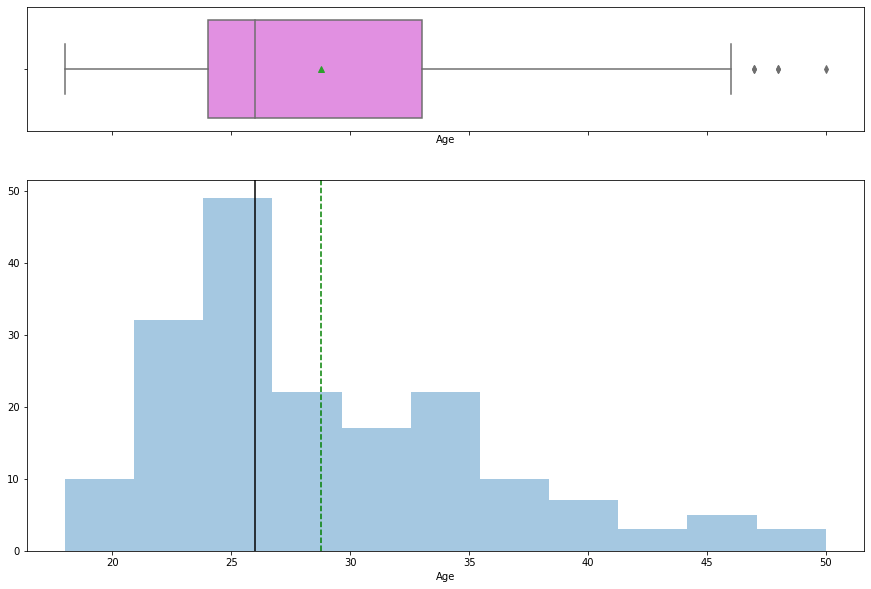

In [36]:
histogram_boxplot(cardio["Age"])

* The distribution of Age is right skewed.
* There are a outliers in this variable.
* From boxplot we can see that the third quartile(Q3) is equal to 33 which means 75% of customers are below the age of 33.

## Observations on Education

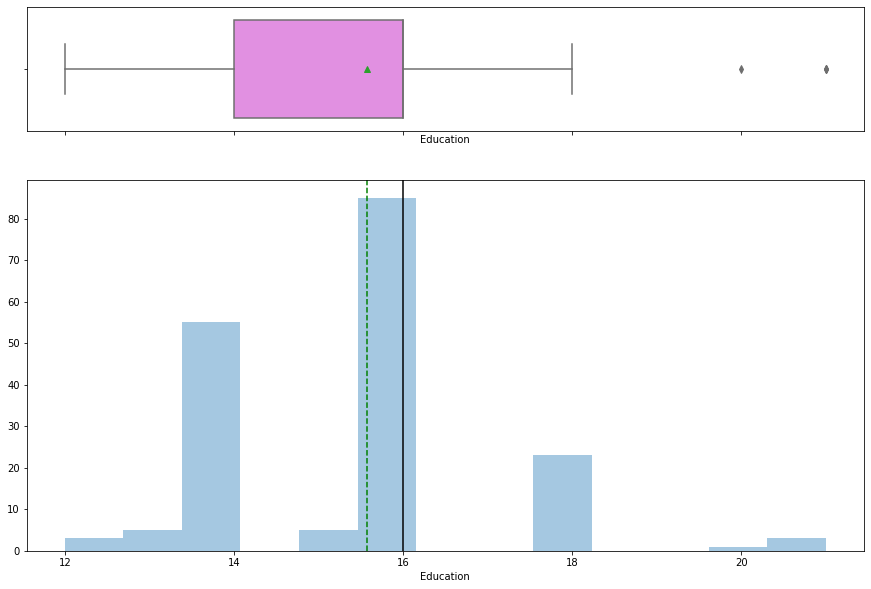

In [37]:
histogram_boxplot(cardio["Education"])

* Mean education for customers is 15.5 years
* There are a few outliers present in data (customers who have education of more than 18 years)

## Observations on Usage

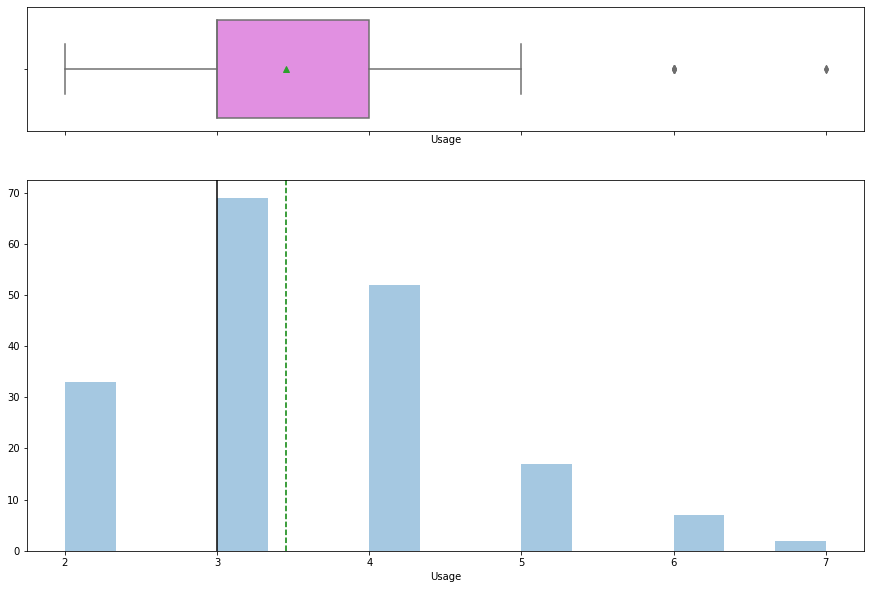

In [17]:
histogram_boxplot(cardio["Usage"])

* Customers want to use the treadmills 3-4 times a week on an average.
* There are few outliers, customers who wish to use treadmills 6-7 times a week.

## Observations on Income

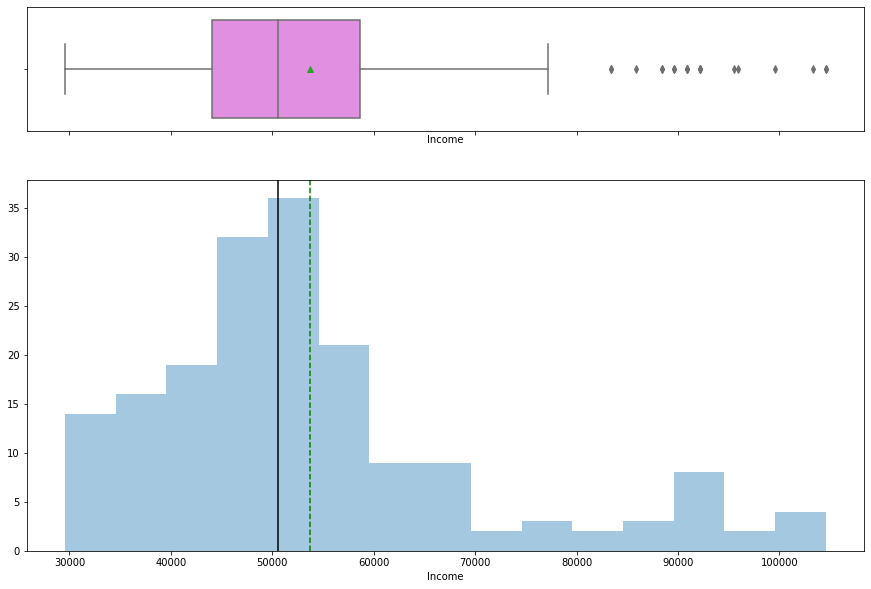

In [18]:
histogram_boxplot(cardio["Income"])

* Mean income of customers who bought treadmill is around 55000.
* Income is right skewed.
* It has many ouliers towards the higher end.

## Observations on Miles

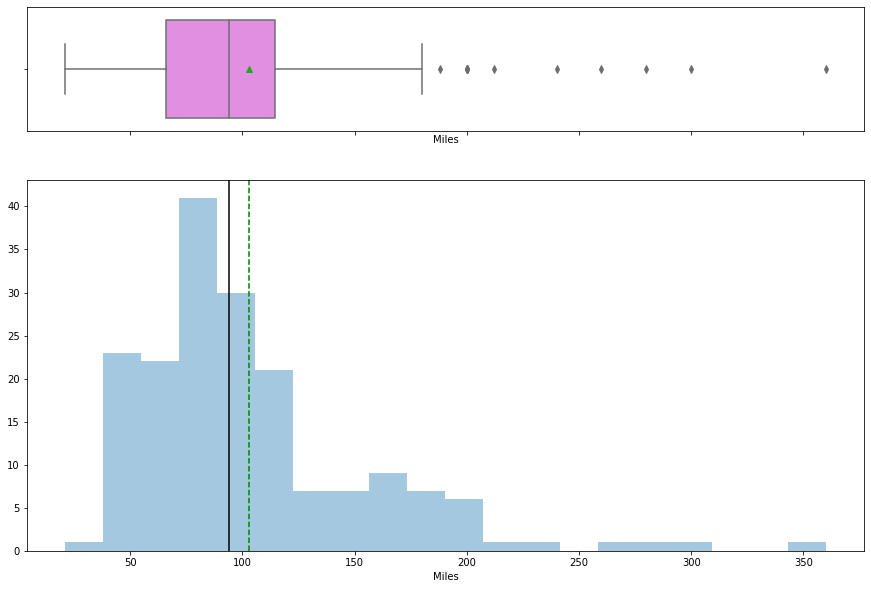

In [19]:
histogram_boxplot(cardio["Miles"])

* Most customers expect to run 100 miles per week.
* Miles run is right skewed	
* There are outliers present, some customers expect to run more than 200 miles per week, some customers wish to run more than 350 miles per week this could be an error in data collection or any professional runner bought the product.

In [20]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Product

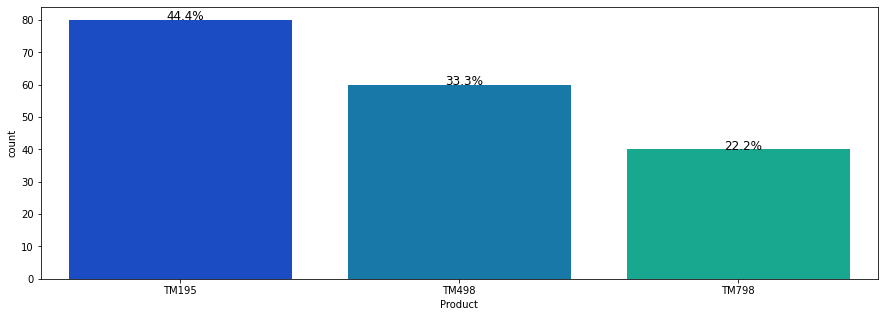

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cardio["Product"],palette='winter')
perc_on_bar(ax,cardio["Product"])

* Highest selling product is TM195(44.4%),followed by TM498(33.3%) and TM798(22.2%)

## Observations on Gender

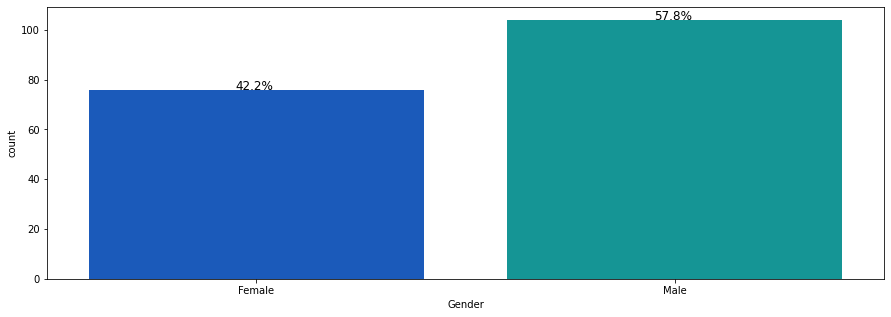

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cardio["Gender"],palette='winter')
perc_on_bar(ax,cardio["Gender"])

* There are more males customers(57.8%) than females(42.2%)

## Observations on Marital Status

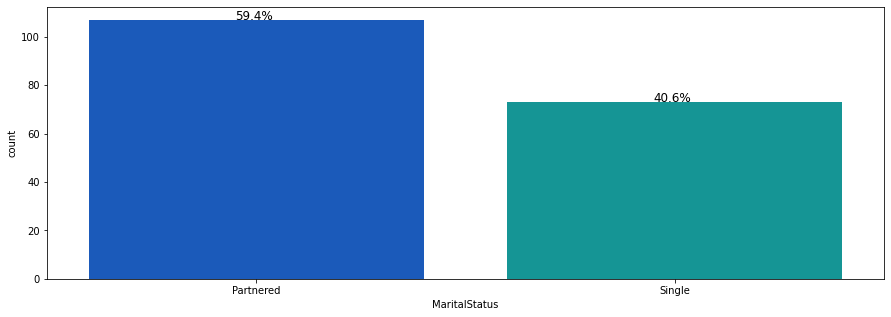

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cardio["MaritalStatus"],palette='winter')
perc_on_bar(ax,cardio["MaritalStatus"])

* 40.6% of customers are single while 59.4% of customers have a partner.

## Observations on Fitness

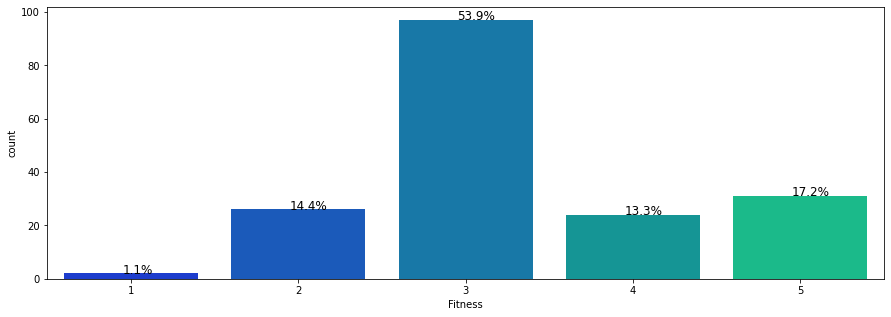

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cardio["Fitness"],palette='winter')
perc_on_bar(ax,cardio["Fitness"])

* 53.9% of the customers have rated them at 3 on a scale of 5 (1 being the least fit and 5 being the most fit),followed by 5 rating (17.2%).

## Observations on Education

* We saw earlier that years of education has a mean of 15.5 years of education, let's check what is the proportion of each level of education among our customer population.

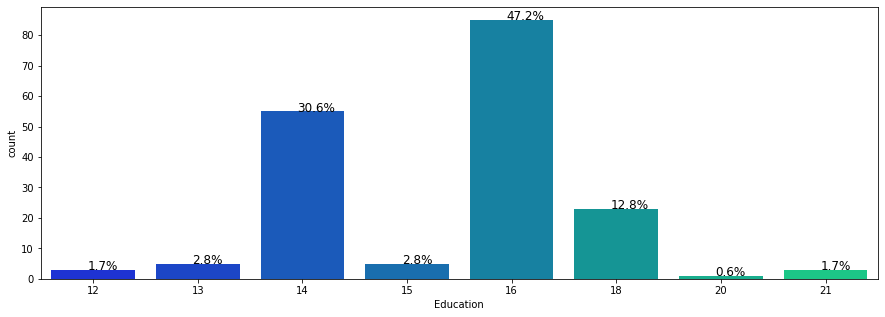

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cardio["Education"],palette='winter')
perc_on_bar(ax,cardio["Education"])

* 47.2% of customers have 16 years of education, followed by 14 years of education(30.6%).

## Observations on Usage

* We saw earlier that customers wish to use products for 3-4 days in a week, let's check what is the proportion of each level of usage among our customer population.

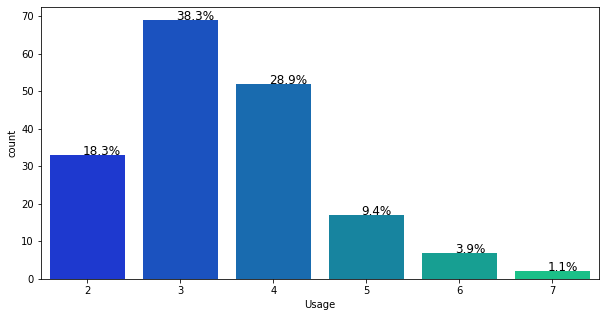

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(cardio["Usage"],palette='winter')
perc_on_bar(ax,cardio["Usage"])

* 38.3% of customers wish to use the product 3 times a week followed by 28.9% customers who wish to use the product 4 times a week.

## Bivariate Analysis

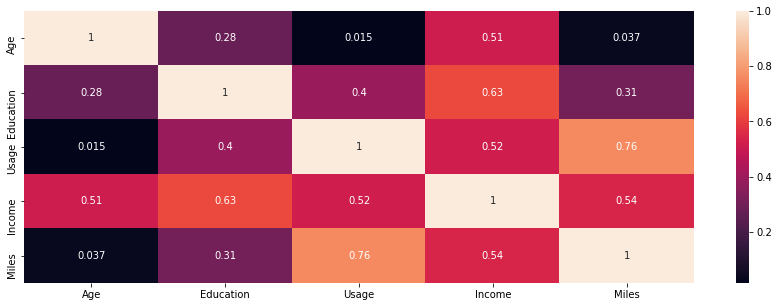

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(cardio.corr(),annot=True)
plt.show()

* Miles is highly correlated with usage, a customer running more miles would mean he is also using the treadmill more. 
* Education and Income has a positive correlation, indicating higher the education higher would be the income.
* Income shows a positive correlation with Age , Usage, and Miles.
* A positive correlation between age and income is expected but a high poistive correlation of income with usage and miles should be investigated further.

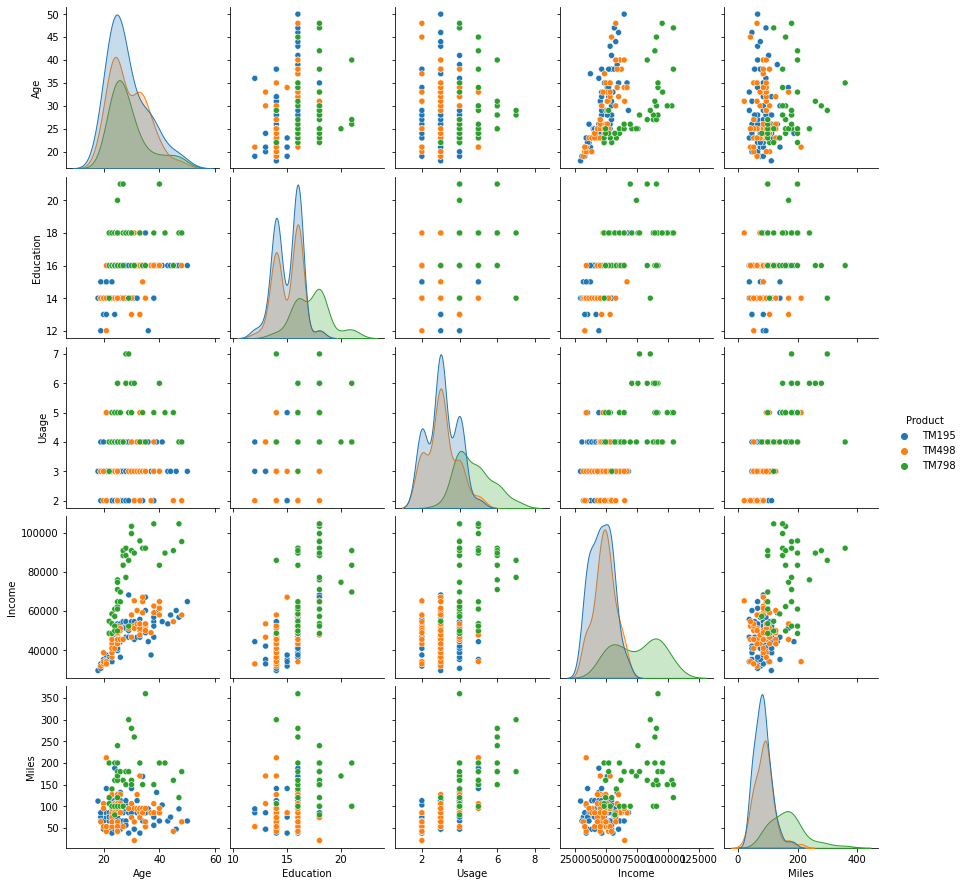

In [28]:
sns.pairplot(data=cardio.drop(["Fitness"],axis=1),hue="Product")
plt.show()

* We can see varying distributions in variables for different products, we should investigate it further.

### Product vs Age

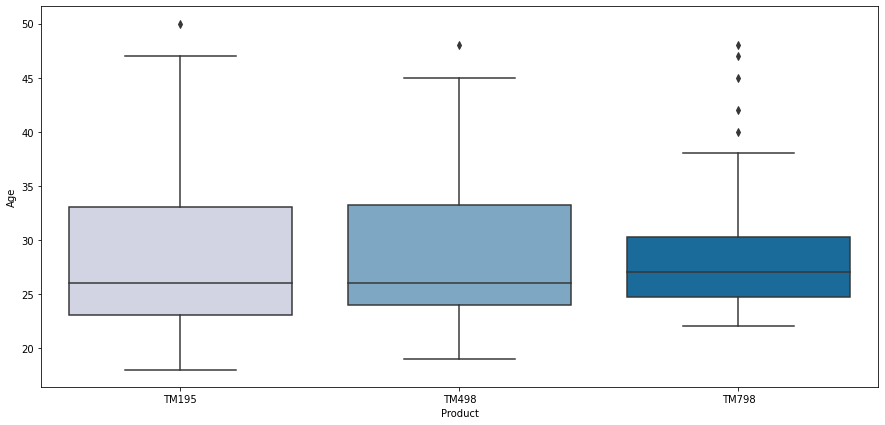

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Product"],cardio["Age"],palette="PuBu")
plt.show()

* TM195 and TM498 are preferred by customers of all ages but for TM798 customers are in the range of above 22 and below 38 (but there are some outliers)

## Product vs Education

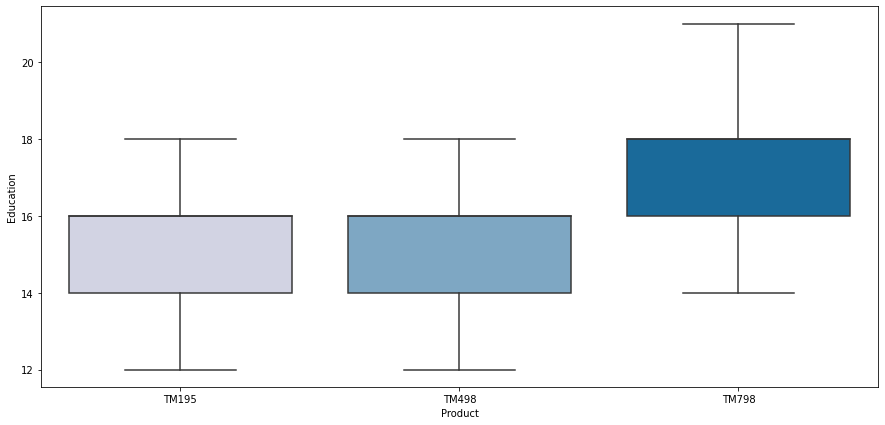

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Product"],cardio["Education"],palette="PuBu")
plt.show()

* Customers buying TM798 have higher education as compared to the customers buying the other two other products

## Product vs Usage

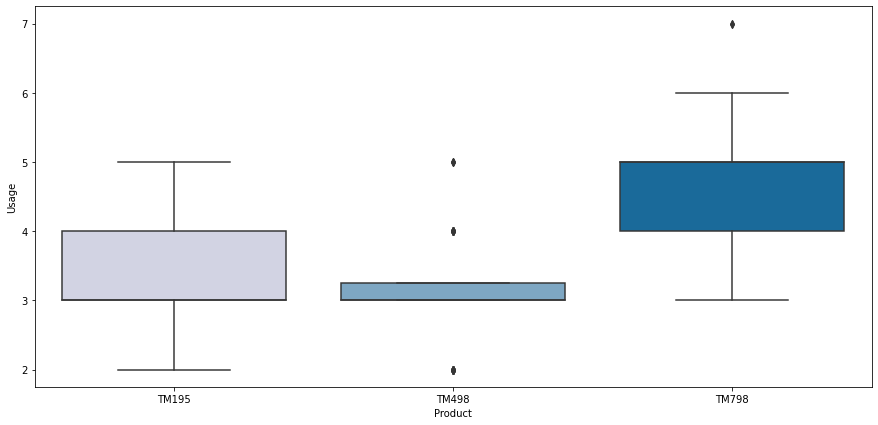

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Product"],cardio["Usage"],palette="PuBu")
plt.show()

* Customers who have higher expected treadmill usage(greater than 3 days) prefer the TM798 product, Customers with very light(2-3 days) usage prefer TM498, customers who have moderate usage (greater than 2 days but less than or equal to 5 days) prefer TM195.

## Product vs Income

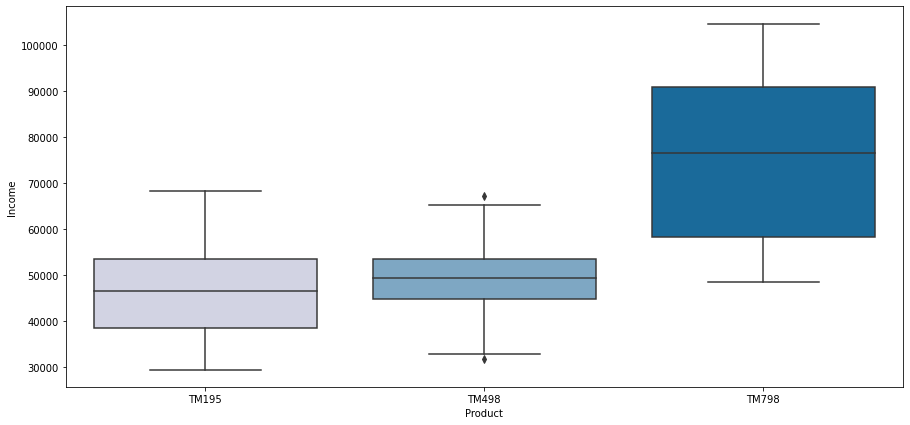

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Product"],cardio["Income"],palette="PuBu")
plt.show()

* Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

## Product vs Miles

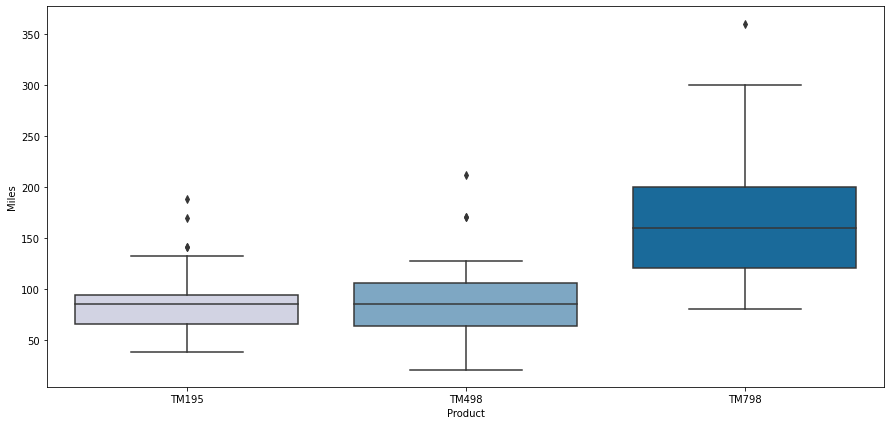

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Product"],cardio["Miles"],palette="PuBu")
plt.show()

* Customers who expect to run higher miles go for TM798.

## Product vs Gender

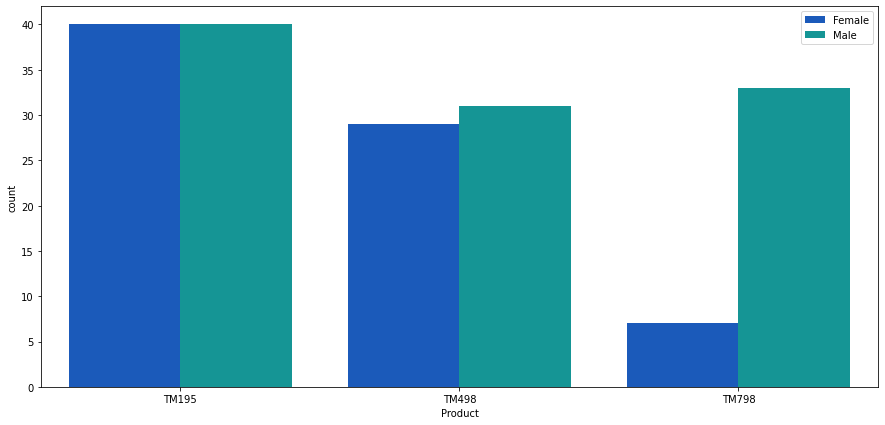

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(cardio["Product"],hue=cardio["Gender"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* TM798 has been bought more by the male customers as compared to the female customers, for TM195 and TM498 there is equal distribution among genders

## Product vs Marital Status

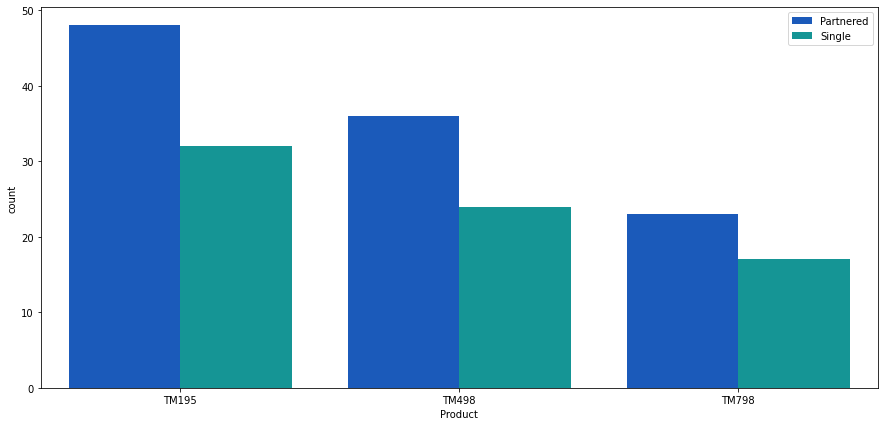

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(cardio["Product"],hue=cardio["MaritalStatus"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* All the products are couple/partner friendly.
* Couples/partnered customers have a higher chance of buying a product when compared to single customers.

## Product vs Fitness

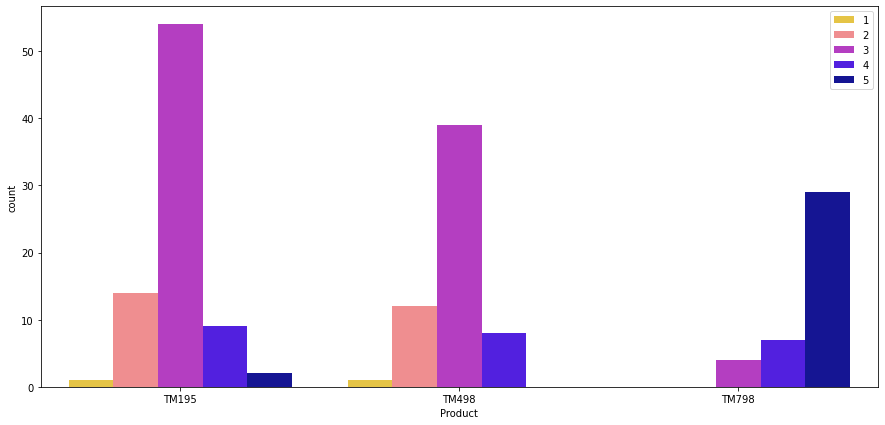

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(cardio["Product"],hue=cardio["Fitness"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers who purchased  TM195 and TM498 gave themselves a balanced fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most of customers have rated themselves higher in fitness that is 5.

### Grouping data w.r.t to products to build customer profiles

In [37]:
cardio[cardio["Product"]=="TM195"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.0,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,54.0,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,NaN,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,NaN,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,NaN,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,53439.00000,94.000000


#### TM195 Customer

The TM195 customer is our regular customer (since this product is sold more than others).
* Early 20’s to early 30’s
* 12-18 years of educataion
* Income between 40K and 50K
* Plans to use treadmill three to four times per week for light usage.
* Has an average fitness level (rated 3)

In [38]:
cardio[cardio["Product"]=="TM498"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.0,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,4.0,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,39.0,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,NaN,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,NaN,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,NaN,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,NaN,53439.000000,106.000000


#### TM498 Customer

The TM498 customers is similar to the TM195 customer in most aspects. The differences are that these customers have a slightly higher annual income, a narrower usage, and a broader expectation of Miles to run each week.

With such a specific usage anticipation it is likely the TM498 customer is a working adult with a fixed or busy schedule (since these customers only tend to use the treadmill 3 times a week)

* Adult in their mid 20’s to early 30’s
* 12-18 years of educatation.
* Income around 50K.
* Plans to use treadmill three days a week for a light to moderate amount.
* Has an average fitness level.

In [39]:
cardio[cardio["Product"]=="TM798"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.0,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,3.0,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,5.0,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,29.0,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,NaN,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,NaN,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,NaN,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,NaN,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,NaN,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,NaN,90886.00000,200.000000


#### TM798 Customer

The TM798 model attracts a specific customer. In stark contrast to models T498 and T195, the T798 customer is predominantly male, highly educated and has higher salary.
* Generally preferred by Males in late 20’s
* Highly Educated
* Higher income earner
* Plans to use treadmill 4-5 days a week, running 160 miles on an average.
* Considers themselves very fit.

### Customer Segmentation

This will help us to understand and cater needs of customers better based on their gender,marital status, Age etc.

## Usage vs Gender vs Marital Status

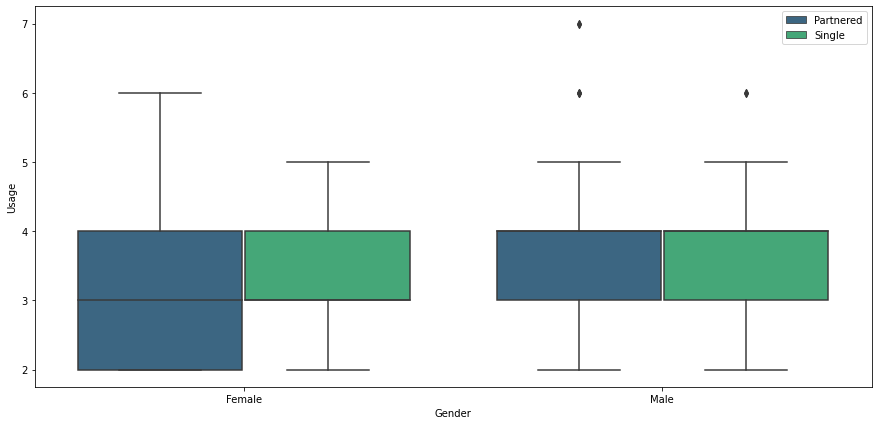

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Gender"],cardio["Usage"],hue=cardio["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Usage for single females, single or partnered male is same it varies for females that have a partner.

## Gender vs Income

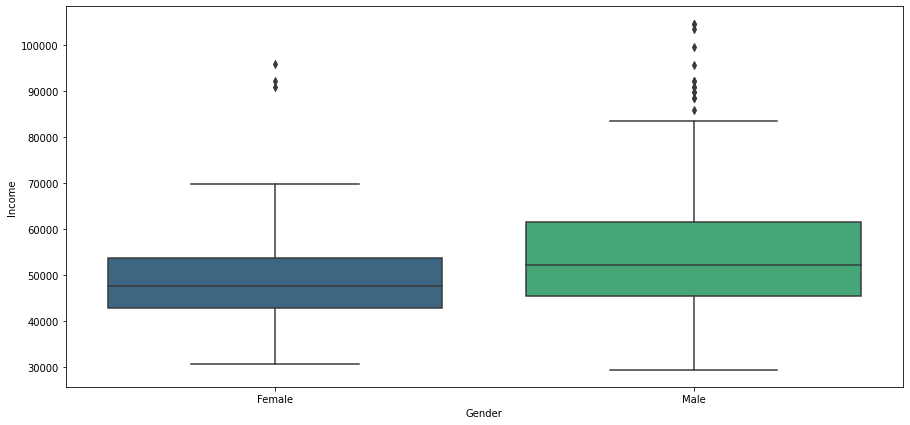

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Gender"],cardio["Income"],palette="viridis")
plt.show()

* There is a large disparity in income of both the genders, there are more males with higher income than females.

## Gender vs Income vs Marital Status

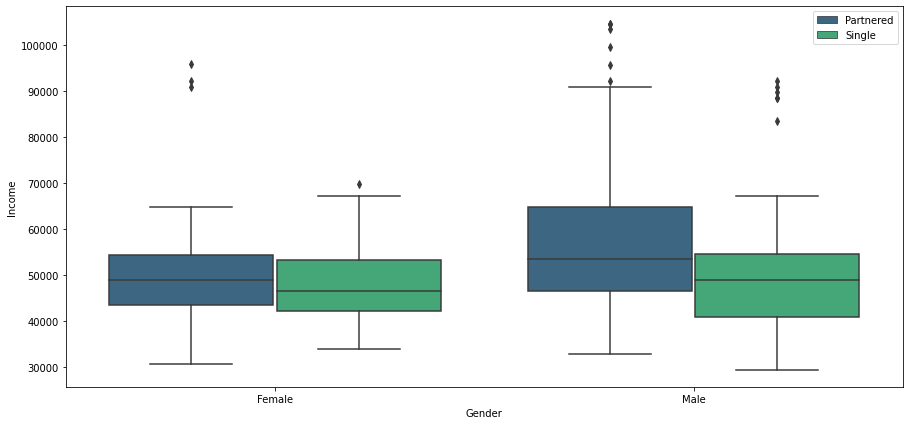

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Gender"],cardio["Income"],hue=cardio["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Males with a partner have higher income, while the income for single and partnered females is almost compareable.

## Gender vs Miles

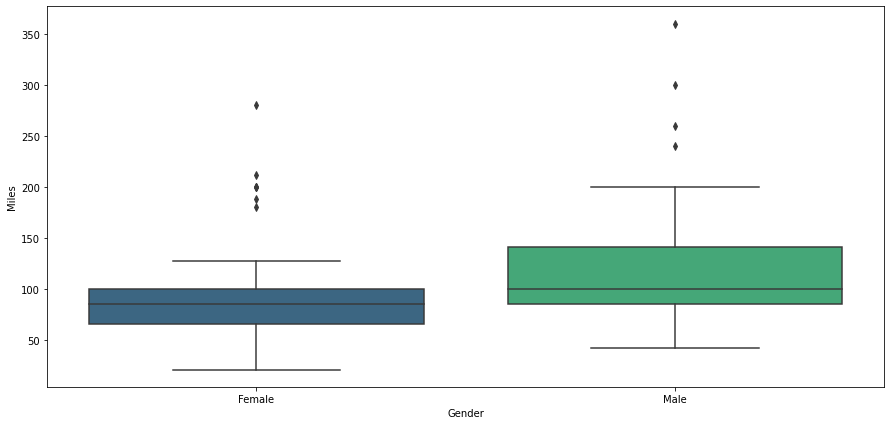

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Gender"],cardio["Miles"],palette="viridis")
plt.show()

* Males expect to run more miles than females

## Gender vs Miles vs Marital Status

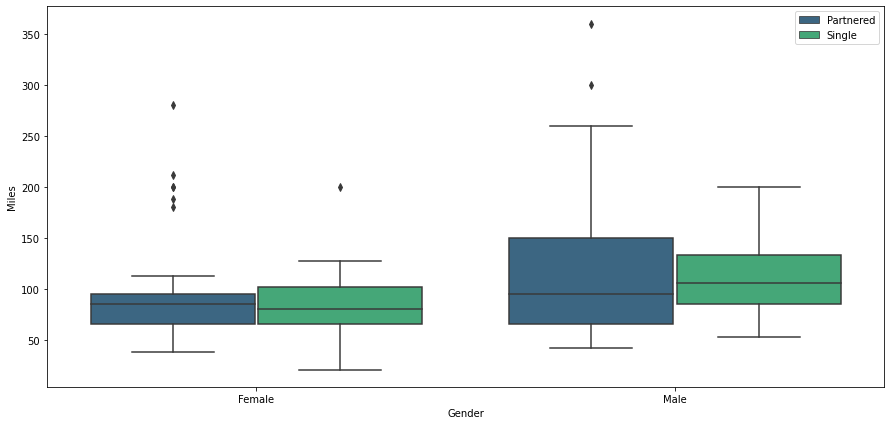

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Gender"],cardio["Miles"],hue=cardio["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Single and Partnered male expect to run more miles, while not much difference can be noticed between Single or Partnered females.

## Gender vs Miles vs Education

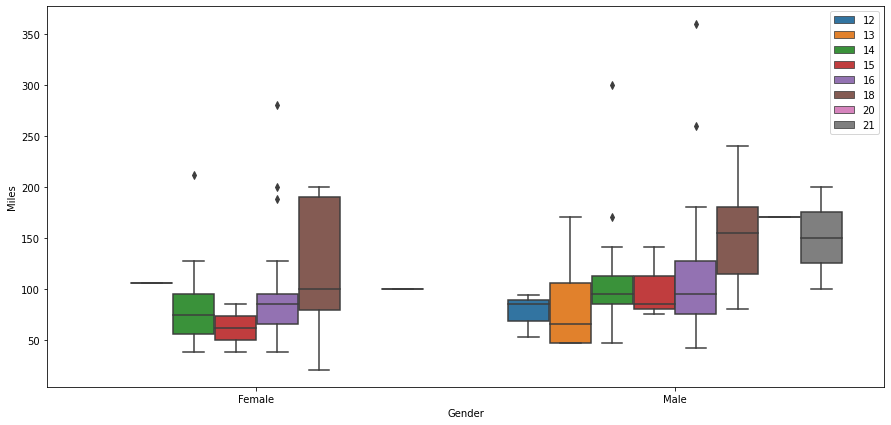

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(cardio["Gender"],cardio["Miles"],hue=cardio["Education"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The expected miles to run increases as the education level increases, indicating that the more educated customers are more fitness aware.

## Age vs Miles vs Gender

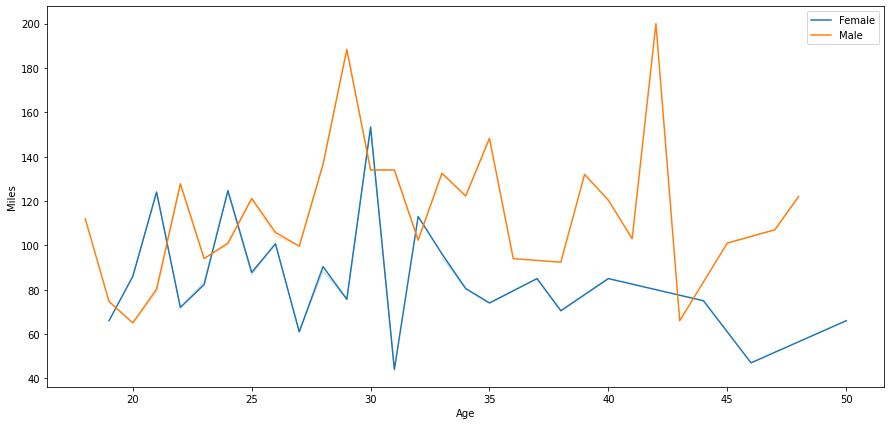

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(cardio["Age"],cardio["Miles"],hue=cardio["Gender"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* With the increase in age the average expected miles to run decreases in females, whereas for males it shows an increasing and decreasing trend.
* As the age increases above 25, males expect to run more miles than females.
* After 30 there is a sharp decrease in the Average miles a female expects to run.

## Age vs Miles vs Marital Status

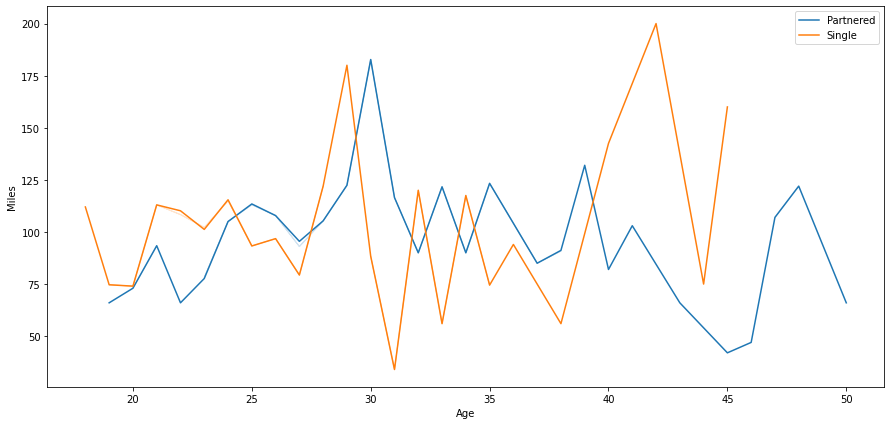

In [47]:
plt.figure(figsize=(15,7))
sns.lineplot(cardio["Age"],cardio["Miles"],hue=cardio["MaritalStatus"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The trend is mostly similar across younger years for a single or a customer with a partner, however after 40 years singles tend to work more on their fitness.

## Age vs Income vs Product

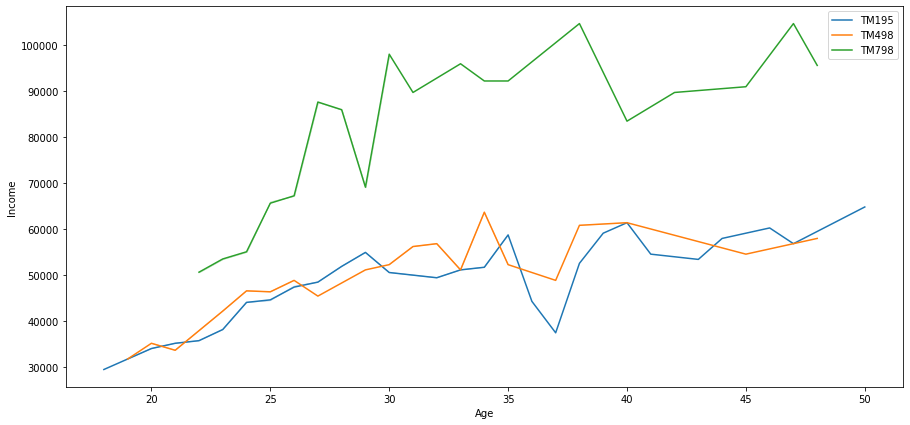

In [48]:
plt.figure(figsize=(15,7))
sns.lineplot(cardio["Age"],cardio["Income"],hue=cardio["Product"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* TM195 and TM498 have simlilar income group customers[30k-60k] for all age groups but TM798 is purchased by higher income [greater than 60k] customers only for all age groups.

## Income vs Miles vs Education

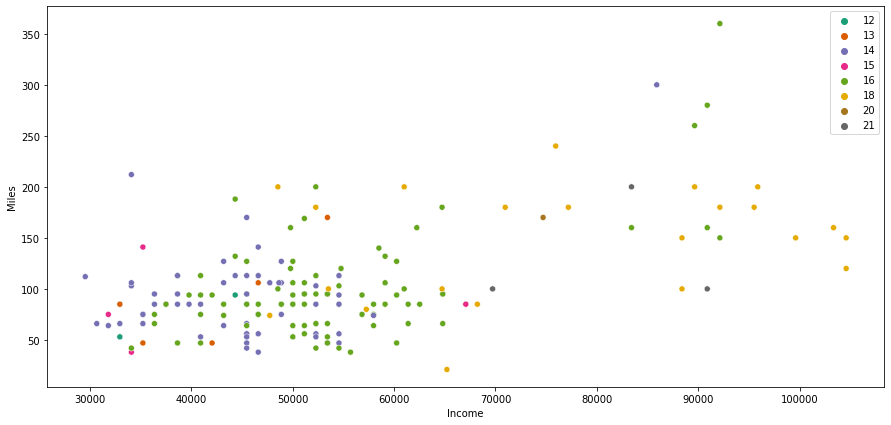

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(cardio["Income"],cardio["Miles"],hue=cardio["Education"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

*  Customers having an income of more than 70k have 18-21 years of education and expect to run 100-200 miles a week.

## Income vs Miles vs Product

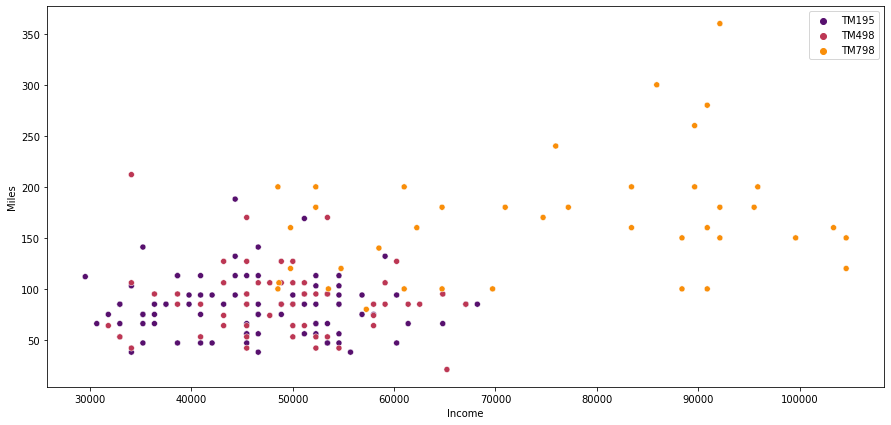

In [50]:
plt.figure(figsize=(15,7))
sns.scatterplot(cardio["Income"],cardio["Miles"],hue=cardio["Product"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers having an income of more than 70k tend to buy TM798 and run more miles.

## Conclusion

### Key insights

#### TM195: 

* An affordable and general-purpose treadmill that can be used for a wide range of users.

* It can be considered as an entry-level product generally targeted for first-time fitness enthusiasts or college-going population. 

* Customers with light to moderate usage 3 to 4 times a week go for this product.


#### TM495: 

* An affordable product like the TM195 with more features and probably has a high price than TM195. 

* The product also generally targets the same age group as the TM195 but has users of slightly higher income.

* The product is used generally 3 times per week.


#### TM798: 

* A top of the range treadmill with plenty of features that excite the fitness enthusiasts. 

* It has a higher price point and probably the flagship product of the company. 

* The buyers of the product are core users that rate themselves very highly on the fitness score as evident from the usage and expected miles to run. 

* The buyers in this segment are more educated, have an income(greater than 60k) more than the other two treadmill users, and take their fitness very seriously. 

* Male customers prefer this product more than females.

### Business Recommendations

* The company has an affordable product in its portfolio that brings in the bulk of the volume of its sales, which is the TM195. The TM798 is their flagship product that brings in the profits for the company. 


* The company needs to engage in more marketing to convey that product TM798 is suitable for both the genders and try to lure the younger age group into buying their flagship product. Currently, it seems TM798 is marketed as an exclusive product for the males making more money as there is a large disparity in income for both genders.


* Years of education are proportionate to income, and so customers with higher education can be recommended an expensive model(TM798).


* Females above 30 years can be recommended the lower end products(TM195 and TM498) since they wish to run a fewer number of miles and therefore the usage of the product won't be higher.


* Partnered Females can be recommended all types of products (low end to high end) since their usage varies from 2 days per week to 6 days per week.


* Singles above 40 years can be recommended the higher end product(TM798) since they wish to run more miles and therefore the usage would be higher.


* Partnered males have a higher income and also expect to run more miles hence the higher end product TM798 would be a good recommendation for them.